### Imports: 

In [56]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

### loading dataset:
#### Description: Loads the Fashion-MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [57]:
dataset = keras.datasets.fashion_mnist

In [58]:
((X_images_training, y_identifications_training), (X_images_test, y_identifications_test)) = dataset.load_data()

### Exploring the data:

In [59]:
X_images_training.shape

(60000, 28, 28)

In [60]:
y_identifications_training.shape

(60000,)

In [61]:
X_images_test.shape

(10000, 28, 28)

In [62]:
y_identifications_test.shape

(10000,)

In [63]:
y_identifications_training.min()

0

In [64]:
y_identifications_training.max()

9

In [65]:
classifiers_total = 10

### Viewing the data: 

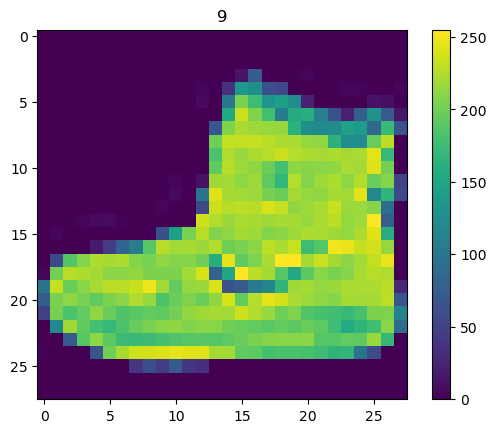

In [66]:
plt.imshow(X_images_training[0])
plt.title(y_identifications_training[0])
plt.colorbar()
plt.show()

In [67]:
classifiers_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

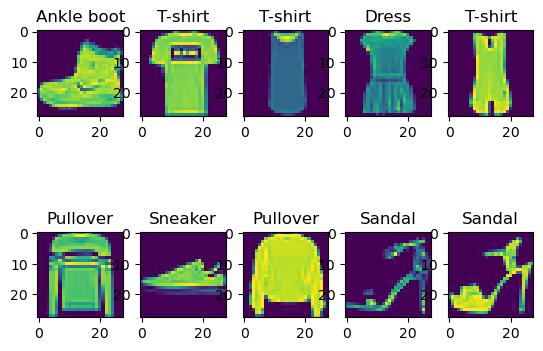

In [68]:
for image in range(0, 10):
    plt.subplot(2, 5, image+1)
    plt.imshow(X_images_training[image])
    plt.title(classifiers_name[y_identifications_training[image]])

### Normalizing the data

In [69]:
X_images_training = X_images_training/float(255)
X_images_test = X_images_test/float(255)

## Training:
### Creating, compiling, training and normalizing the model with dropout.

In [156]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), 
            keras.callbacks.ModelCheckpoint(filepath='best_model.Keras', 
                                           monitor='val_loss', save_best_only=True)]

adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


history = model.fit(X_images_training, 
                    y_identifications_training, 
                    batch_size=480, 
                    epochs=5, 
                    validation_split=0.2, 
                   callbacks=callbacks)

Epoch 1/5
 98/100 [============================>.] - ETA: 0s - loss: 0.7193 - accuracy: 0.7561INFO:tensorflow:Assets written to: best_model.Keras\assets


INFO:tensorflow:Assets written to: best_model.Keras\assets


100/100 [==============================] - 2s 14ms/step - loss: 0.7145 - accuracy: 0.7580 - val_loss: 0.4955 - val_accuracy: 0.8306
Epoch 2/5
 95/100 [===========================>..] - ETA: 0s - loss: 0.4788 - accuracy: 0.8356INFO:tensorflow:Assets written to: best_model.Keras\assets


INFO:tensorflow:Assets written to: best_model.Keras\assets


100/100 [==============================] - 1s 13ms/step - loss: 0.4772 - accuracy: 0.8361 - val_loss: 0.4276 - val_accuracy: 0.8517
Epoch 3/5
 96/100 [===========================>..] - ETA: 0s - loss: 0.4201 - accuracy: 0.8534INFO:tensorflow:Assets written to: best_model.Keras\assets


INFO:tensorflow:Assets written to: best_model.Keras\assets


100/100 [==============================] - 1s 15ms/step - loss: 0.4186 - accuracy: 0.8537 - val_loss: 0.3929 - val_accuracy: 0.8615
Epoch 4/5
 96/100 [===========================>..] - ETA: 0s - loss: 0.3879 - accuracy: 0.8646INFO:tensorflow:Assets written to: best_model.Keras\assets


INFO:tensorflow:Assets written to: best_model.Keras\assets


100/100 [==============================] - 1s 13ms/step - loss: 0.3873 - accuracy: 0.8650 - val_loss: 0.3722 - val_accuracy: 0.8695
Epoch 5/5
 99/100 [============================>.] - ETA: 0s - loss: 0.3671 - accuracy: 0.8700INFO:tensorflow:Assets written to: best_model.Keras\assets


INFO:tensorflow:Assets written to: best_model.Keras\assets


100/100 [==============================] - 1s 14ms/step - loss: 0.3673 - accuracy: 0.8699 - val_loss: 0.3663 - val_accuracy: 0.8696


### Visualizing training and validation:

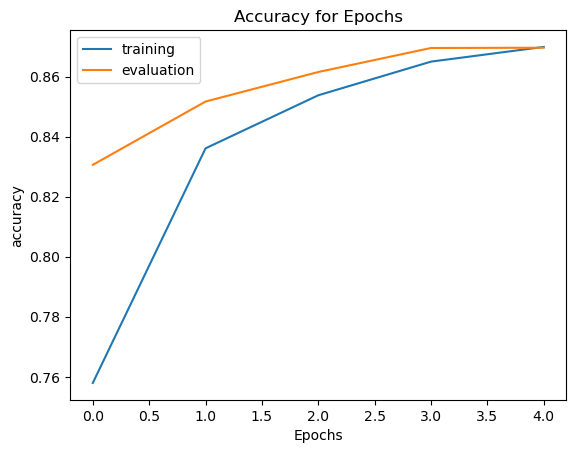

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

### Visualizing losses and validation:

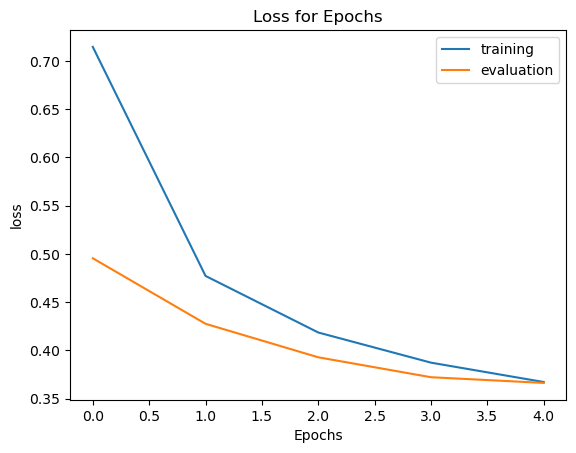

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()

#### Test 

In [159]:
test_model = model.predict(X_images_test)
np.argmax(test_model[0])

313/313 [==============================] - 0s 1ms/step


9

#### Real answer

In [160]:
y_identifications_test[0]

9

### Evaluating the model with the  test base (X_test and y_test):

In [161]:
model.evaluate(X_images_test, y_identifications_test)
test_loss, test_accuracy = model.evaluate(X_images_test, y_identifications_test)
print('\n')
print(f'Loss: {test_loss}')
print('\n')
print(f'Accuracy: {test_accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8629


Loss: 0.38911324739456177


Accuracy: 0.8629000186920166


## Salving training model:

In [88]:
model.save('model.keras')

In [89]:
model_salve = load_model('model.keras')

### Testing the saved model:

In [23]:
test_model = model_salve.predict(X_images_test)
np.argmax(test_model[0])

313/313 [==============================] - 0s 1ms/step


9

### Real answer:

In [24]:
y_identifications_test[0]

9

### Analyzing the structure of the training model:

### Summary of Model:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

### Weights of Model:

#### First  Dense layer weights: 

In [27]:
layer1_weights_Dense = model.layers[1].get_weights()[0]
layer1_weights_Dense

array([[-0.03397673, -0.06971195, -0.05011599, ...,  0.03627004,
        -0.02437316,  0.02047784],
       [-0.01184324, -0.06539178, -0.05270242, ...,  0.03516667,
         0.01017577, -0.04582955],
       [-0.04601851, -0.06126696, -0.0375388 , ..., -0.09759767,
        -0.05561156,  0.10321005],
       ...,
       [-0.07919839, -0.0686916 , -0.09105205, ..., -0.06031759,
        -0.0824409 , -0.16410969],
       [-0.04986041, -0.07796095, -0.06562814, ...,  0.00537599,
        -0.06141881,  0.05316512],
       [-0.06770488,  0.03558697,  0.01769967, ...,  0.01092212,
        -0.07050065,  0.06732957]], dtype=float32)

In [28]:
layer1_biases_Dense =  model.layers[1].get_weights()[1]
layer1_biases_Dense

array([-0.05387358,  0.18546405, -0.10105813, -0.33593047, -0.30103147,
        0.05157402,  0.28724805, -0.02040338, -0.16724251,  0.3872857 ,
       -0.00467917,  0.02582589,  0.11742631,  0.20295362, -0.18323314,
        0.09686486,  0.2332985 ,  0.36019093,  0.355569  ,  0.02538742,
        0.0490711 ,  0.10290074, -0.00591733,  0.19496554,  0.3333365 ,
        0.3247331 ,  0.0641638 ,  0.0507121 ,  0.22274168,  0.3955752 ,
       -0.05794533, -0.01573195,  0.40490574,  0.42711267, -0.00176398,
        0.3749726 ,  0.15445262,  0.24892238,  0.1698905 ,  0.25965193,
        0.18622188,  0.13392341,  0.40338245, -0.00143344,  0.15114686,
        0.14216192,  0.05282864, -0.20887683,  0.25108862,  0.16251299,
        0.11141667, -0.02044965,  0.25929072,  0.2949856 ,  0.0799403 ,
        0.05057229, -0.01407768,  0.3484124 , -0.02201787, -0.01534557,
       -0.01844157, -0.00973196,  0.09634403,  0.15176144,  0.3056427 ,
        0.3415978 ,  0.25250703, -0.17682676,  0.14410095,  0.00

### Initialize the biases to zero

In [29]:
layer1_weights_Dense.shape

(784, 256)

In [30]:
layer1_weights_Dense_0 = np.zeros((784, 256))
layer1_weights_Dense_0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
model.layers[1].set_weights(
    [layer1_weights_Dense_0, layer1_biases_Dense]
)
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.05387358,  0.18546405, -0.10105813, -0.33593047, -0.30103147,
         0.05157402,  0.28724805, -0.02040338, -0.16724251,  0.3872857 ,
        -0.00467917,  0.02582589,  0.11742631,  0.20295362, -0.18323314,
         0.09686486,  0.2332985 ,  0.36019093,  0.355569  ,  0.02538742,
         0.0490711 ,  0.10290074, -0.00591733,  0.19496554,  0.3333365 ,
         0.3247331 ,  0.0641638 ,  0.0507121 ,  0.22274168,  0.3955752 ,
        -0.05794533, -0.01573195,  0.40490574,  0.42711267, -0.00176398,
         0.3749726 ,  0.15445262,  0.24892238,  0.1698905 ,  0.25965193,
         0.18622188,  0.13392341,  0.40338245, -0.00143344,  0.15114686,
         0.14216192,  0.05282864, -0.20887683,  0.25108862,  0.16251299,
      

In [32]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.05387358,  0.18546405, -0.10105813, -0.33593047, -0.30103147,
         0.05157402,  0.28724805, -0.02040338, -0.16724251,  0.3872857 ,
        -0.00467917,  0.02582589,  0.11742631,  0.20295362, -0.18323314,
         0.09686486,  0.2332985 ,  0.36019093,  0.355569  ,  0.02538742,
         0.0490711 ,  0.10290074, -0.00591733,  0.19496554,  0.3333365 ,
         0.3247331 ,  0.0641638 ,  0.0507121 ,  0.22274168,  0.3955752 ,
        -0.05794533, -0.01573195,  0.40490574,  0.42711267, -0.00176398,
         0.3749726 ,  0.15445262,  0.24892238,  0.1698905 ,  0.25965193,
         0.18622188,  0.13392341,  0.40338245, -0.00143344,  0.15114686,
         0.14216192,  0.05282864, -0.20887683,  0.25108862,  0.16251299,
      

### Testing the model with zero weights:

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history_w0 = model.fit(X_images_training, y_identifications_training, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5328 - accuracy: 0.8066 - val_loss: 0.4308 - val_accuracy: 0.8402
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4076 - accuracy: 0.8516 - val_loss: 0.3668 - val_accuracy: 0.8657
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3725 - accuracy: 0.8644 - val_loss: 0.3579 - val_accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3514 - accuracy: 0.8708 - val_loss: 0.3455 - val_accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3332 - accuracy: 0.8762 - val_loss: 0.3360 - val_accuracy: 0.8811


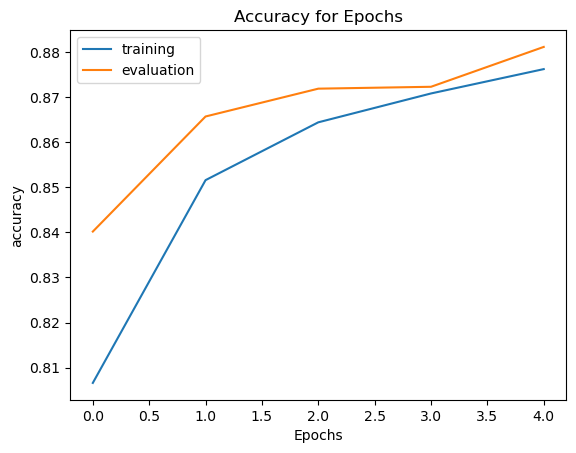

In [34]:
plt.plot(history_w0.history['accuracy'])
plt.plot(history_w0.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

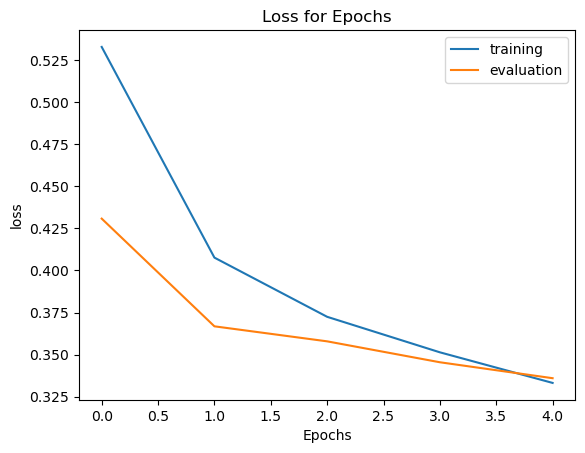

In [35]:
plt.plot(history_w0.history['loss'])
plt.plot(history_w0.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()

### Testing the model with random weights:

In [36]:
layer1_weights_Dense_random = np.random.rand(784, 256)
layer1_weights_Dense_random

array([[0.45546177, 0.23863573, 0.98408876, ..., 0.68658992, 0.30450592,
        0.03296575],
       [0.75113428, 0.36121655, 0.81529291, ..., 0.62993413, 0.22268289,
        0.59922155],
       [0.29388027, 0.50404306, 0.05644322, ..., 0.39792453, 0.42466418,
        0.25145858],
       ...,
       [0.08466372, 0.783724  , 0.59551949, ..., 0.59341066, 0.13156202,
        0.62641128],
       [0.98787027, 0.82349751, 0.96919469, ..., 0.30609682, 0.02777287,
        0.61688674],
       [0.93430962, 0.35397845, 0.94524481, ..., 0.3321547 , 0.02857915,
        0.92255363]])

In [37]:
model.layers[1].set_weights(
    [layer1_weights_Dense_random, layer1_biases_Dense]
)
model.layers[1].get_weights()

[array([[0.45546177, 0.23863573, 0.9840888 , ..., 0.6865899 , 0.3045059 ,
         0.03296575],
        [0.7511343 , 0.36121655, 0.8152929 , ..., 0.62993413, 0.2226829 ,
         0.5992215 ],
        [0.29388028, 0.50404304, 0.05644322, ..., 0.39792454, 0.42466417,
         0.2514586 ],
        ...,
        [0.08466372, 0.783724  , 0.5955195 , ..., 0.5934107 , 0.13156202,
         0.62641126],
        [0.9878703 , 0.82349753, 0.9691947 , ..., 0.30609682, 0.02777287,
         0.61688673],
        [0.9343096 , 0.35397846, 0.9452448 , ..., 0.3321547 , 0.02857915,
         0.9225536 ]], dtype=float32),
 array([-0.05387358,  0.18546405, -0.10105813, -0.33593047, -0.30103147,
         0.05157402,  0.28724805, -0.02040338, -0.16724251,  0.3872857 ,
        -0.00467917,  0.02582589,  0.11742631,  0.20295362, -0.18323314,
         0.09686486,  0.2332985 ,  0.36019093,  0.355569  ,  0.02538742,
         0.0490711 ,  0.10290074, -0.00591733,  0.19496554,  0.3333365 ,
         0.3247331 ,  0.06416

In [38]:
model.layers[1].get_weights()

[array([[0.45546177, 0.23863573, 0.9840888 , ..., 0.6865899 , 0.3045059 ,
         0.03296575],
        [0.7511343 , 0.36121655, 0.8152929 , ..., 0.62993413, 0.2226829 ,
         0.5992215 ],
        [0.29388028, 0.50404304, 0.05644322, ..., 0.39792454, 0.42466417,
         0.2514586 ],
        ...,
        [0.08466372, 0.783724  , 0.5955195 , ..., 0.5934107 , 0.13156202,
         0.62641126],
        [0.9878703 , 0.82349753, 0.9691947 , ..., 0.30609682, 0.02777287,
         0.61688673],
        [0.9343096 , 0.35397846, 0.9452448 , ..., 0.3321547 , 0.02857915,
         0.9225536 ]], dtype=float32),
 array([-0.05387358,  0.18546405, -0.10105813, -0.33593047, -0.30103147,
         0.05157402,  0.28724805, -0.02040338, -0.16724251,  0.3872857 ,
        -0.00467917,  0.02582589,  0.11742631,  0.20295362, -0.18323314,
         0.09686486,  0.2332985 ,  0.36019093,  0.355569  ,  0.02538742,
         0.0490711 ,  0.10290074, -0.00591733,  0.19496554,  0.3333365 ,
         0.3247331 ,  0.06416

### Testing the model with randon weights:

In [39]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history_rd = model.fit(X_images_training, y_identifications_training, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 122.9487 - accuracy: 0.4068 - val_loss: 14.7182 - val_accuracy: 0.7314
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 31.7147 - accuracy: 0.6276 - val_loss: 11.8130 - val_accuracy: 0.7585
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 14.9097 - accuracy: 0.6916 - val_loss: 8.2748 - val_accuracy: 0.7298
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 7.4079 - accuracy: 0.7273 - val_loss: 3.3718 - val_accuracy: 0.8058
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 4.0115 - accuracy: 0.7511 - val_loss: 2.3761 - val_accuracy: 0.8156


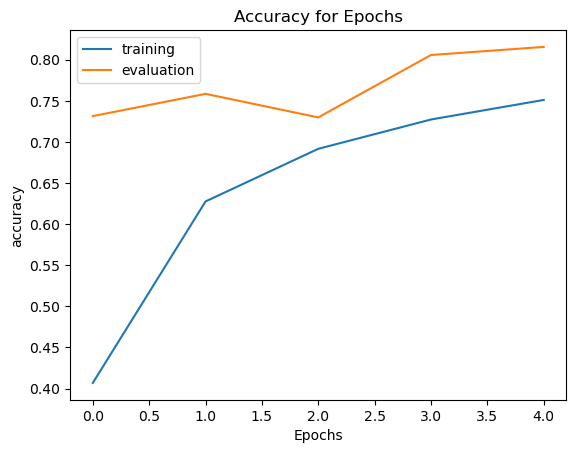

In [40]:
plt.plot(history_rd.history['accuracy'])
plt.plot(history_rd.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

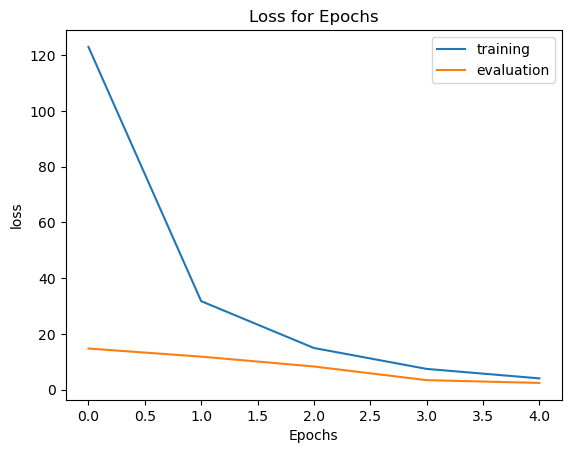

In [41]:
plt.plot(history_rd.history['loss'])
plt.plot(history_rd.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()

### Initialize the biases to zero:

In [42]:
layer1_biases_Dense.shape
layer1_biases_Dense_0 = np.zeros((256,))
layer1_biases_Dense_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
model.layers[1].set_weights(
    [layer1_weights_Dense_0, layer1_biases_Dense_0]
)
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [44]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Testing the model with zero weights and zero biases:

In [45]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history_0_0 = model.fit(X_images_training, y_identifications_training, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4295 - accuracy: 0.1001 - val_loss: 2.3271 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3094 - accuracy: 0.1001 - val_loss: 2.3032 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1027


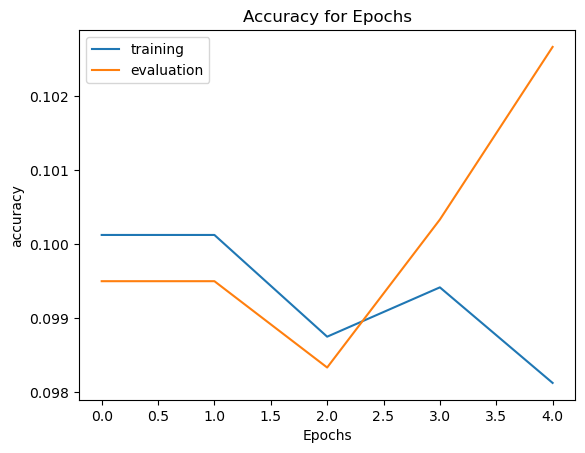

In [46]:
plt.plot(history_0_0.history['accuracy'])
plt.plot(history_0_0.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

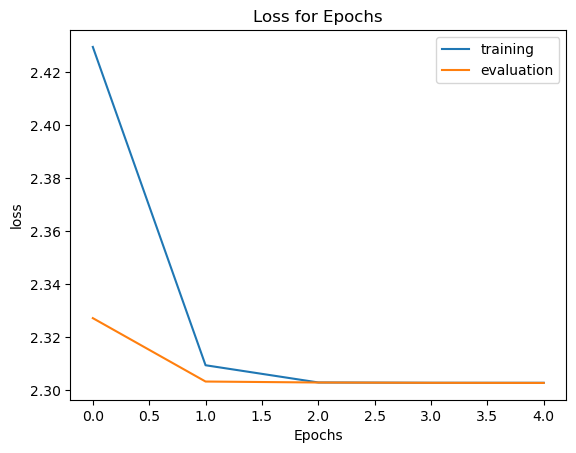

In [47]:
plt.plot(history_0_0.history['loss'])
plt.plot(history_0_0.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()

### Testing the model with random weights and zero biases:

In [48]:
model.layers[1].set_weights(
    [layer1_weights_Dense_random, layer1_biases_Dense_0]
)
model.layers[1].get_weights()

[array([[0.45546177, 0.23863573, 0.9840888 , ..., 0.6865899 , 0.3045059 ,
         0.03296575],
        [0.7511343 , 0.36121655, 0.8152929 , ..., 0.62993413, 0.2226829 ,
         0.5992215 ],
        [0.29388028, 0.50404304, 0.05644322, ..., 0.39792454, 0.42466417,
         0.2514586 ],
        ...,
        [0.08466372, 0.783724  , 0.5955195 , ..., 0.5934107 , 0.13156202,
         0.62641126],
        [0.9878703 , 0.82349753, 0.9691947 , ..., 0.30609682, 0.02777287,
         0.61688673],
        [0.9343096 , 0.35397846, 0.9452448 , ..., 0.3321547 , 0.02857915,
         0.9225536 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [49]:
model.layers[1].get_weights()

[array([[0.45546177, 0.23863573, 0.9840888 , ..., 0.6865899 , 0.3045059 ,
         0.03296575],
        [0.7511343 , 0.36121655, 0.8152929 , ..., 0.62993413, 0.2226829 ,
         0.5992215 ],
        [0.29388028, 0.50404304, 0.05644322, ..., 0.39792454, 0.42466417,
         0.2514586 ],
        ...,
        [0.08466372, 0.783724  , 0.5955195 , ..., 0.5934107 , 0.13156202,
         0.62641126],
        [0.9878703 , 0.82349753, 0.9691947 , ..., 0.30609682, 0.02777287,
         0.61688673],
        [0.9343096 , 0.35397846, 0.9452448 , ..., 0.3321547 , 0.02857915,
         0.9225536 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [50]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history_rd_0 = model.fit(X_images_training, y_identifications_training, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 38.5552 - accuracy: 0.4004 - val_loss: 8.2135 - val_accuracy: 0.5732
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 11.0687 - accuracy: 0.5746 - val_loss: 4.8102 - val_accuracy: 0.6302
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 5.9730 - accuracy: 0.6393 - val_loss: 3.6227 - val_accuracy: 0.6777
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.8790 - accuracy: 0.6805 - val_loss: 2.1749 - val_accuracy: 0.7487
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3937 - accuracy: 0.7170 - val_loss: 1.5730 - val_accuracy: 0.7667


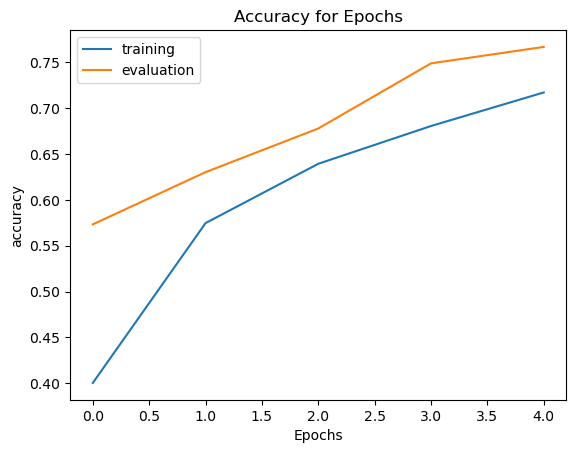

In [51]:
plt.plot(history_rd_0.history['accuracy'])
plt.plot(history_rd_0.history['val_accuracy'])
plt.title('Accuracy for Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'evaluation'])
plt.show()

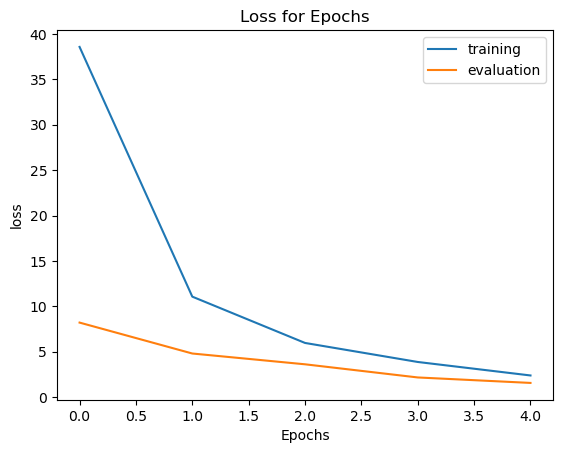

In [52]:
plt.plot(history_rd_0.history['loss'])
plt.plot(history_rd_0.history['val_loss'])
plt.title('Loss for Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training', 'evaluation'])
plt.show()